In [46]:
#################################
# Airline Passenger Forecasting
#################################

##################################################
# Statistical Methods
##################################################
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')



In [47]:
################################
# DATA VISUALISATION
#################################
# Here this file should be imported in correct format
df = pd.read_csv('airline-passengers.csv', index_col='month', parse_dates=True)
df.shape

(144, 1)

In [48]:
df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


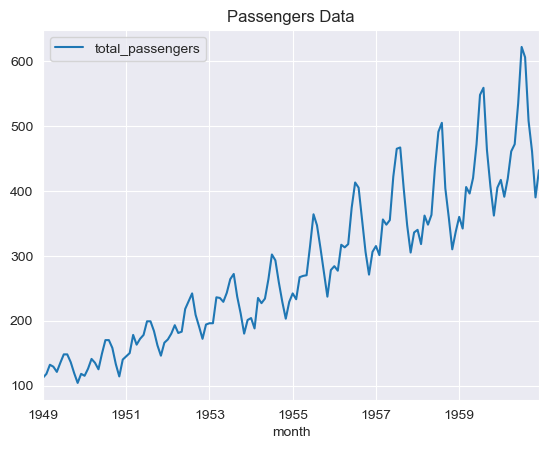

In [49]:
df[['total_passengers']].plot(title='Passengers Data')
plt.show()

In [50]:
# Here monthly data frequency should be introduced
df.index.freq = "MS"
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq='MS')

In [51]:
len(df)

144

In [52]:
#split data to train and test
train = df[:120]
test = df[120:]

In [53]:
#############################################
# Single Exponential Smoothing
#############################################
# THIS FUNCTION BELOW IS TO RETURN THE BEST PARAMETERS TO Single Exponential Smoothing
def ses_optimizer(train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae



ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

In [54]:
#Here we set parameters interval. In order to spend less time on calculation, we have set it to.020
#STEPS MEANS 24 MONTHS FOR TEST DATA
alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=24)
# best_alpha: 0.11 best_mae: 82.528

alpha: 0.01 mae: 190.1195
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438
best_alpha: 0.11 best_mae: 82.528


In [55]:
# lET'S FORECAST 24 MONTHS ON TRAIN DATA. SEASONAL PERIOD IS SET AS 12 WHICH MEANS 12 MONTHS OF CIRCLE
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

In [56]:
y_pred

1959-01-01    374.74047
1959-02-01    374.74047
1959-03-01    374.74047
1959-04-01    374.74047
1959-05-01    374.74047
1959-06-01    374.74047
1959-07-01    374.74047
1959-08-01    374.74047
1959-09-01    374.74047
1959-10-01    374.74047
1959-11-01    374.74047
1959-12-01    374.74047
1960-01-01    374.74047
1960-02-01    374.74047
1960-03-01    374.74047
1960-04-01    374.74047
1960-05-01    374.74047
1960-06-01    374.74047
1960-07-01    374.74047
1960-08-01    374.74047
1960-09-01    374.74047
1960-10-01    374.74047
1960-11-01    374.74047
1960-12-01    374.74047
Freq: MS, dtype: float64

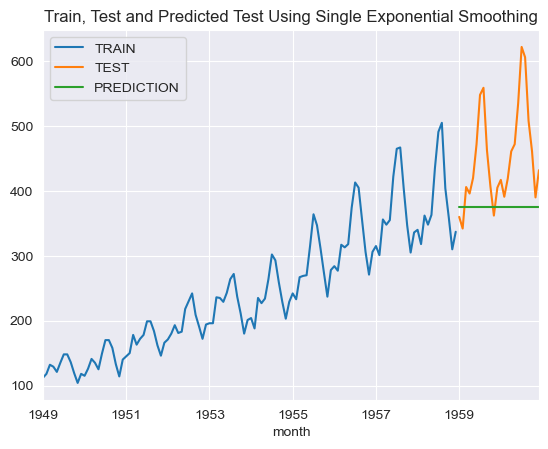

In [57]:
#LET'S VISUALIZE THE PREDICTIONS
def plot_prediction(y_pred, label):
    train["total_passengers"].plot(legend=True, label="TRAIN")
    test["total_passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()

plot_prediction(y_pred, "Single Exponential Smoothing")

In [58]:
#################################
# Double Exponential Smoothing
#################################
# SIMILIAR PROCESS FOR Double Exponential Smoothing
def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae
#Here we set parameters interval. In order to spend less time on calculation, we have set it to.020
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

In [59]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)
#STEPS MEANS 24 MONTHS FOR TEST DATA
best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=24)
# best_alpha: 0.01 best_beta: 0.11 best_mae: 54.1036

alpha: 0.01 beta: 0.01 mae: 54.9512
alpha: 0.01 beta: 0.11 mae: 54.1036
alpha: 0.01 beta: 0.21 mae: 55.557
alpha: 0.01 beta: 0.31 mae: 57.3247
alpha: 0.01 beta: 0.41 mae: 57.7931
alpha: 0.01 beta: 0.51 mae: 57.9968
alpha: 0.01 beta: 0.61 mae: 57.9637
alpha: 0.01 beta: 0.71 mae: 57.5635
alpha: 0.01 beta: 0.81 mae: 57.3335
alpha: 0.01 beta: 0.91 mae: 57.8984
alpha: 0.11 beta: 0.01 mae: 55.0309
alpha: 0.11 beta: 0.11 mae: 58.4728
alpha: 0.11 beta: 0.21 mae: 69.6339
alpha: 0.11 beta: 0.31 mae: 72.555
alpha: 0.11 beta: 0.41 mae: 78.8168
alpha: 0.11 beta: 0.51 mae: 81.996
alpha: 0.11 beta: 0.61 mae: 77.2262
alpha: 0.11 beta: 0.71 mae: 71.5042
alpha: 0.11 beta: 0.81 mae: 69.0258
alpha: 0.11 beta: 0.91 mae: 67.8408
alpha: 0.21 beta: 0.01 mae: 57.1824
alpha: 0.21 beta: 0.11 mae: 74.992
alpha: 0.21 beta: 0.21 mae: 95.9492
alpha: 0.21 beta: 0.31 mae: 115.3164
alpha: 0.21 beta: 0.41 mae: 139.4303
alpha: 0.21 beta: 0.51 mae: 178.3759
alpha: 0.21 beta: 0.61 mae: 243.4543
alpha: 0.21 beta: 0.71 mae: 

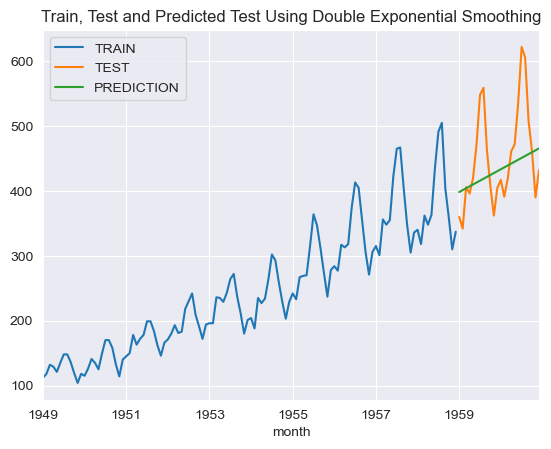

In [60]:
# lET'S FORECAST 24 MONTHS ON TRAIN DATA. SEASONAL PERIOD IS SET AS 12 WHICH MEANS 12 MONTHS OF CIRCLE
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)
y_pred = des_model.forecast(24)

plot_prediction(y_pred, "Double Exponential Smoothing")

In [61]:
##############################################
# Triple Exponential Smoothing (Holt-Winters)
##############################################
# THIS FUNCTION BELOW IS TO RETURN THE BEST PARAMETERS TO Triple Exponential Smoothing
def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

In [62]:
#Here we set parameters interval. In order to spend less time on calculation, we have set it to.020
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))
#STEPS MEANS 24 MONTHS FOR TEST DATA
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=24)

# best_alpha: 0.3 best_beta: 0.3 best_gamma: 0.5 best_mae: 11.9947

[0.1, 0.1, 0.1, 36.83]
[0.1, 0.1, 0.3, 34.88]
[0.1, 0.1, 0.5, 35.91]
[0.1, 0.1, 0.7, 38.72]
[0.1, 0.1, 0.9, 42.55]
[0.1, 0.3, 0.1, 53.96]
[0.1, 0.3, 0.3, 53.0]
[0.1, 0.3, 0.5, 56.98]
[0.1, 0.3, 0.7, 61.38]
[0.1, 0.3, 0.9, 67.17]
[0.1, 0.5, 0.1, 56.76]
[0.1, 0.5, 0.3, 51.72]
[0.1, 0.5, 0.5, 53.39]
[0.1, 0.5, 0.7, 60.08]
[0.1, 0.5, 0.9, 79.29]
[0.1, 0.7, 0.1, 34.04]
[0.1, 0.7, 0.3, 25.93]
[0.1, 0.7, 0.5, 27.81]
[0.1, 0.7, 0.7, 27.91]
[0.1, 0.7, 0.9, 38.32]
[0.1, 0.9, 0.1, 26.87]
[0.1, 0.9, 0.3, 25.32]
[0.1, 0.9, 0.5, 53.88]
[0.1, 0.9, 0.7, 38.38]
[0.1, 0.9, 0.9, 17.78]
[0.3, 0.1, 0.1, 54.54]
[0.3, 0.1, 0.3, 38.34]
[0.3, 0.1, 0.5, 31.57]
[0.3, 0.1, 0.7, 30.99]
[0.3, 0.1, 0.9, 29.23]
[0.3, 0.3, 0.1, 72.71]
[0.3, 0.3, 0.3, 22.6]
[0.3, 0.3, 0.5, 11.99]
[0.3, 0.3, 0.7, 17.11]
[0.3, 0.3, 0.9, 22.32]
[0.3, 0.5, 0.1, 132.33]
[0.3, 0.5, 0.3, 25.74]
[0.3, 0.5, 0.5, 17.3]
[0.3, 0.5, 0.7, 38.38]
[0.3, 0.5, 0.9, 56.82]
[0.3, 0.7, 0.1, 288.32]
[0.3, 0.7, 0.3, 134.86]
[0.3, 0.7, 0.5, 96.77]
[0.3, 0.7, 

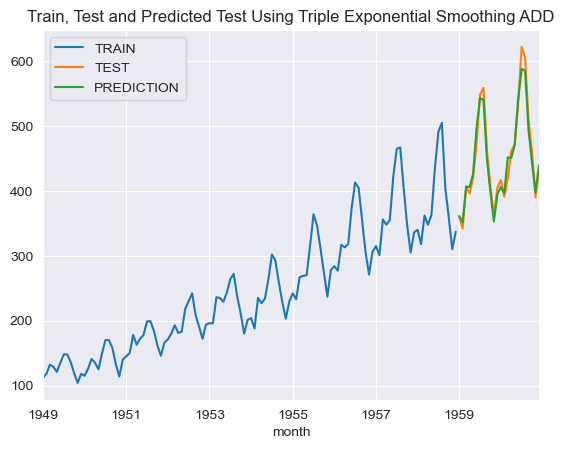

In [63]:
# lET'S FORECAST 24 MONTHS ON TRAIN DATA. SEASONAL PERIOD IS SET AS 12 WHICH MEANS 12 MONTHS OF CIRCLE
tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred = tes_model.forecast(24)

plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

In [64]:
#  Triple Exponential Smoothing (Holt-Winters) model returned lowest MAE (error value)
# and drawn the most well matched predictions to train data matched graph among all above 3 models

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1680.2792351899682
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1557.6320531166166
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1060.4792883429307
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1014.0696747520217
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1231.9865853807983
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1185.3010979088663
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:969.3781382611074
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:951.6210719866543
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1524.3620853404605
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.5942349370112
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:967.5225695585139
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:942.2425093046613
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1136.4998829526808
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.8397209554603
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:918.2233876023324
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:896.6974385819685
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1138.8088994229304
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC

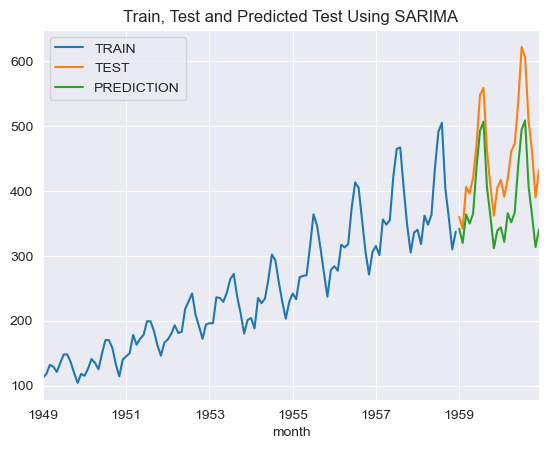

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:367.20954575359883
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:72.6297263680213
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:74.93604626044335
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:76.79705866252057
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:58.599738782362046
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.615022002846757
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:442.67323632605377
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:356.2897856579239
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:70.49252853104515
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:71.32051669098982
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:75.48451767838412
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:76.43334244598192
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:61.013885410555446
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:31.739625216825857
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:115.25
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:119.36368440589472
SARIMA(0, 1, 0)x(0, 

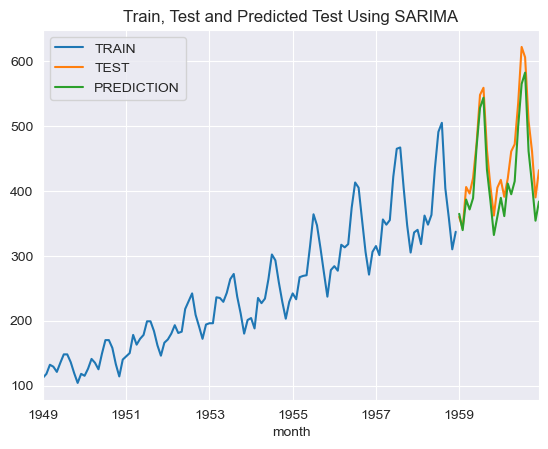

In [67]:
##################################################
# SARIMA
##################################################
# RANGE HAS BEEN TO (0,2) FOR LESS CALCULATION TIME
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# THIS FUNCTION BELOW IS TO RETURN THE BEST PARAMETERS TO Triple Exponential Smoothing
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)
# PREDICTIONS  FOR 24 MONTHS
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)

y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 68.57726545235921

plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")


# MAE


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# THIS FUNCTION IS TI OPTIMIZE MAE ( FOR LOWER ERROR VALUES)
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=24)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)

                # mae = fit_model_sarima(train, val, param, param_seasonal)

                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)
y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 30.623362595882828

plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")



In [68]:
# Final model
# LET'S PREDICT NEXT 6 MONTHS
tes_model_final = ExponentialSmoothing(df, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

tes_model_final.forecast(6)


1961-01-01    450.286326
1961-02-01    429.302006
1961-03-01    475.721692
1961-04-01    502.017533
1961-05-01    516.825531
1961-06-01    579.037137
Freq: MS, dtype: float64